In [78]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import gmplot

In [3]:
df = pd.read_csv('event.csv', names=['Month', 'Date', 'Year', 'Offence', 'Offence_Desc', 'Borough', 'Lat', 'Long', 'Count'])

In [15]:
jul4 = df.loc[(df['Month']==7) & (df['Date']==4)]


,Month,Date,Year,Offence,Offence_Desc,Borough,Lat,Long,Count
805611,7,4,2006,ADMINISTRATIVE CODE,ADM.CODEUNCLASSIFIED MISDEMEA,BROOKLYN,40.655986,-73.954723,1
805612,7,4,2006,ADMINISTRATIVE CODE,ADM.CODEUNCLASSIFIED MISDEMEA,BROOKLYN,40.700342,-73.916692,1
805613,7,4,2006,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,BRONX,40.835940,-73.886466,1
805614,7,4,2006,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,BRONX,40.846954,-73.852110,1
805615,7,4,2006,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,BRONX,40.849321,-73.912359,1


In [17]:
jul4['Year'].value_counts()

2012    472
2014    457
2009    455
2013    427
2011    426
2015    418
2010    405
2016    403
2006    386
2008    377
2007    376
Name: Year, dtype: int64

In [19]:
yearwise = jul4[['Year', 'Borough', 'Count']].groupby(['Year', 'Borough'])['Count'].sum()
yearwise

Year  Borough      
2006  BRONX             83
      BROOKLYN         125
      MANHATTAN         87
      QUEENS            74
      STATEN ISLAND     35
2007  BRONX             95
      BROOKLYN         121
      MANHATTAN         71
      QUEENS            88
      STATEN ISLAND     25
2008  BRONX             76
      BROOKLYN         133
      MANHATTAN         71
      QUEENS            99
      STATEN ISLAND     20
2009  BRONX             88
      BROOKLYN         162
      MANHATTAN        105
      QUEENS           104
      STATEN ISLAND     25
2010  BRONX             79
      BROOKLYN         142
      MANHATTAN         77
      QUEENS           101
      STATEN ISLAND     17
2011  BRONX             85
      BROOKLYN         171
      MANHATTAN         61
      QUEENS           116
      STATEN ISLAND     26
2012  BRONX            104
      BROOKLYN         164
      MANHATTAN         90
      QUEENS           113
      STATEN ISLAND     27
2013  BRONX            106
      BR

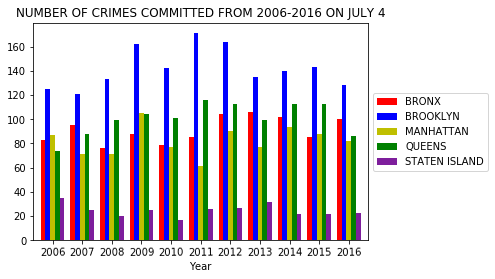

In [77]:
fig=plt.figure(figsize=(100, 100), dpi= 150, facecolor='w', edgecolor='k')
colors=['r', 'b', 'y', 'g', 'xkcd:purple']
legends = ['2006','2007','2008','2009', '2010', '2011','2012','2013','2014','2015', '2016']
a = yearwise.unstack().plot(kind='bar', rot=1, title="NUMBER OF CRIMES COMMITTED FROM 2006-2016 ON JULY 4", legend=legends, color=colors, label=legends, width=0.8)
a.legend(loc='center left',bbox_to_anchor = (1,0.5))

In [27]:
specific_crimes = jul4[['Year', 'Offence', 'Count']].groupby(['Year', 'Offence'])['Count'].count().nlargest(11)
specific_crimes

Year  Offence                       
2014  PETIT LARCENY                     150
2013  PETIT LARCENY                     132
2010  PETIT LARCENY                     120
2011  PETIT LARCENY                     119
2009  PETIT LARCENY                     118
2015  PETIT LARCENY                     117
2016  PETIT LARCENY                     113
2012  ASSAULT 3 & RELATED OFFENSES      111
2009  CRIMINAL MISCHIEF & RELATED OF    108
2016  ASSAULT 3 & RELATED OFFENSES      107
2014  ASSAULT 3 & RELATED OFFENSES      103
Name: Count, dtype: int64

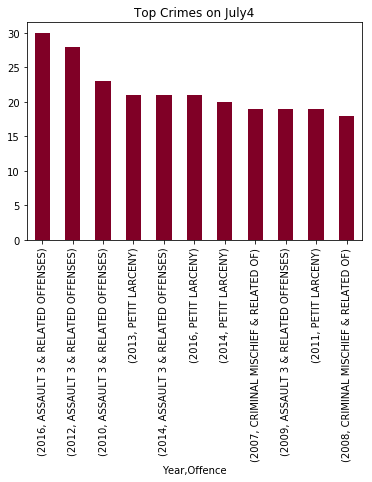

In [73]:
specific_crimes.plot(kind='bar', title="Top Crimes on July4",colormap='YlOrRd_r')

In [79]:
total_crimes = jul4[['Offence', 'Count']].groupby(['Offence'])['Count'].count().nlargest(30)
total_crimes

Offence
PETIT LARCENY                      1249
ASSAULT 3 & RELATED OFFENSES       1039
CRIMINAL MISCHIEF & RELATED OF      849
OFF. AGNST PUB ORD SENSBLTY &       462
DANGEROUS DRUGS                     235
OFFENSES AGAINST PUBLIC ADMINI      203
OFFENSES AGAINST THE PERSON         112
CRIMINAL TRESPASS                    80
OFFENSES AGAINST PUBLIC SAFETY       73
DANGEROUS WEAPONS                    53
INTOXICATED & IMPAIRED DRIVING       50
SEX CRIMES                           48
UNAUTHORIZED USE OF A VEHICLE        35
VEHICLE AND TRAFFIC LAWS             23
FRAUDS                               22
POSSESSION OF STOLEN PROPERTY        16
ADMINISTRATIVE CODE                  16
OTHER OFFENSES RELATED TO THEF       15
OFFENSES INVOLVING FRAUD              7
OTHER STATE LAWS  NON PENAL LA        4
FRAUDULENT ACCOSTING                  4
BURGLARS TOOLS                        2
ALCOHOLIC BEVERAGE CONTROL LAW        1
JOSTLING                              1
GAMBLING                        

In [84]:
holiday_crimes = jul4.loc[(jul4['Offence']=="OFF. AGNST PUB ORD SENSBLTY &") | (jul4['Offence']=="OFFENSES AGAINST PUBLIC ADMINI") | (jul4['Offence']=="INTOXICATED & IMPAIRED DRIVING") | (jul4['Offence']=="DANGEROUS WEAPONS") | (jul4['Offence']=="OFFENSES AGAINST PUBLIC SAFETY") | (jul4['Offence']=="VEHICLE AND TRAFFIC LAWS")  ]          

In [86]:
gmap = gmplot.GoogleMapPlotter(holiday_crimes.iloc[1,6], holiday_crimes.iloc[1,7], 10)

gmap.scatter(holiday_crimes.iloc[:, 6], holiday_crimes.iloc[:, 7], '#FF6666', edge_width=5, marker=False)
gmap.draw('independenceDay.html')

C:\Users\ss104\Anaconda3\lib\site-packages\gmplot\gmplot.py:255: RuntimeWarning: invalid value encountered in double_scalars
  x = ((lng1 - dlng + math.pi) % (2.0 * math.pi)) - math.pi


In [34]:
# bronx
bronx = jul4.loc[df['Borough']=='BRONX']


In [52]:
bronx_crimes = bronx[['Year', 'Offence', 'Count']].groupby(['Year', 'Offence'])['Count'].count().nlargest(11)
bronx_crimes

Year  Offence                       
2016  ASSAULT 3 & RELATED OFFENSES      30
2012  ASSAULT 3 & RELATED OFFENSES      28
2010  ASSAULT 3 & RELATED OFFENSES      23
2013  PETIT LARCENY                     21
2014  ASSAULT 3 & RELATED OFFENSES      21
2016  PETIT LARCENY                     21
2014  PETIT LARCENY                     20
2007  CRIMINAL MISCHIEF & RELATED OF    19
2009  ASSAULT 3 & RELATED OFFENSES      19
2011  PETIT LARCENY                     19
2008  CRIMINAL MISCHIEF & RELATED OF    18
Name: Count, dtype: int64

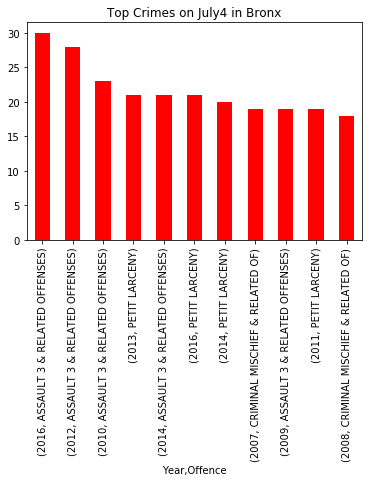

In [55]:
bronx_crimes.plot.bar(color='red', title="Top Crimes on July4 in Bronx")

In [57]:
# brooklyn
brooklyn = jul4.loc[df['Borough']=='BROOKLYN']

In [58]:
brooklyn_crimes = brooklyn[['Year', 'Offence', 'Count']].groupby(['Year', 'Offence'])['Count'].count().nlargest(11)
brooklyn_crimes

Year  Offence                       
2014  PETIT LARCENY                     52
2011  PETIT LARCENY                     46
2013  PETIT LARCENY                     44
2009  PETIT LARCENY                     43
2010  PETIT LARCENY                     43
2011  ASSAULT 3 & RELATED OFFENSES      43
2015  ASSAULT 3 & RELATED OFFENSES      41
2009  CRIMINAL MISCHIEF & RELATED OF    38
2015  PETIT LARCENY                     37
2006  PETIT LARCENY                     36
2012  PETIT LARCENY                     36
Name: Count, dtype: int64

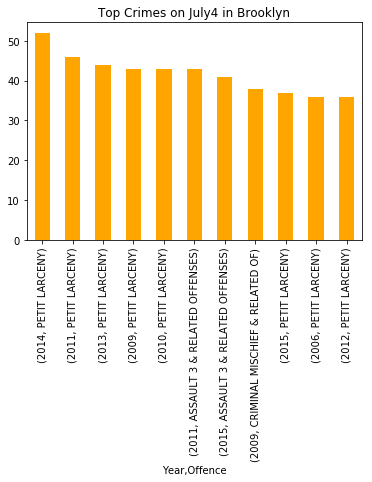

In [59]:
brooklyn_crimes.plot.bar(color='orange', title="Top Crimes on July4 in Brooklyn")

In [60]:
# manhattan
manhattan = jul4.loc[df['Borough']=='MANHATTAN']

In [61]:
manhattan_crimes = manhattan[['Year', 'Offence', 'Count']].groupby(['Year', 'Offence'])['Count'].count().nlargest(11)
manhattan_crimes

Year  Offence                     
2014  PETIT LARCENY                   36
2009  PETIT LARCENY                   31
2013  PETIT LARCENY                   31
2016  PETIT LARCENY                   28
2010  PETIT LARCENY                   26
2008  PETIT LARCENY                   25
2009  ASSAULT 3 & RELATED OFFENSES    25
2006  PETIT LARCENY                   24
2015  PETIT LARCENY                   24
2007  PETIT LARCENY                   21
2014  ASSAULT 3 & RELATED OFFENSES    20
Name: Count, dtype: int64

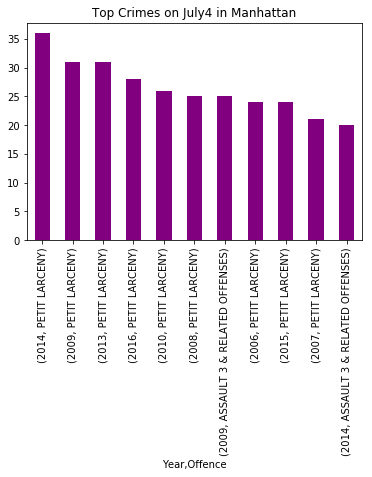

In [75]:
manhattan_crimes.plot.bar(color='purple', title="Top Crimes on July4 in Manhattan")

In [63]:
# queens
queens = jul4.loc[df['Borough']=='QUEENS']

In [64]:
queens_crimes = queens[['Year', 'Offence', 'Count']].groupby(['Year', 'Offence'])['Count'].count().nlargest(11)
queens_crimes

Year  Offence                       
2015  PETIT LARCENY                     38
2014  PETIT LARCENY                     37
2010  PETIT LARCENY                     32
2011  ASSAULT 3 & RELATED OFFENSES      32
2014  ASSAULT 3 & RELATED OFFENSES      30
2012  ASSAULT 3 & RELATED OFFENSES      29
2015  ASSAULT 3 & RELATED OFFENSES      29
2009  CRIMINAL MISCHIEF & RELATED OF    28
2011  PETIT LARCENY                     28
2012  PETIT LARCENY                     28
2013  PETIT LARCENY                     27
Name: Count, dtype: int64

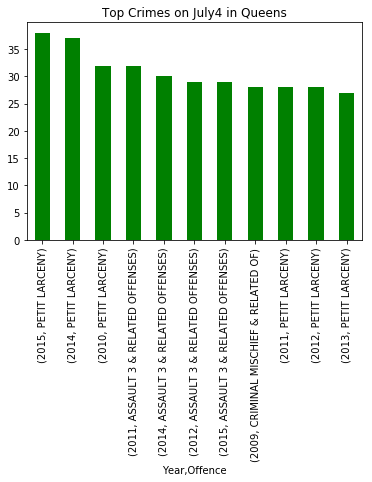

In [70]:
queens_crimes.plot.bar(color='green', title="Top Crimes on July4 in Queens")

In [67]:
# staten
staten = jul4.loc[df['Borough']=='STATEN ISLAND']

In [68]:
staten_crimes = staten[['Year', 'Offence', 'Count']].groupby(['Year', 'Offence'])['Count'].count().nlargest(11)
staten_crimes

Year  Offence                       
2006  OFF. AGNST PUB ORD SENSBLTY &     10
2009  CRIMINAL MISCHIEF & RELATED OF    10
2006  CRIMINAL MISCHIEF & RELATED OF     9
2007  CRIMINAL MISCHIEF & RELATED OF     9
2012  CRIMINAL MISCHIEF & RELATED OF     9
2013  PETIT LARCENY                      9
2006  PETIT LARCENY                      8
2013  CRIMINAL MISCHIEF & RELATED OF     8
2007  PETIT LARCENY                      7
2008  PETIT LARCENY                      7
2009  PETIT LARCENY                      7
Name: Count, dtype: int64

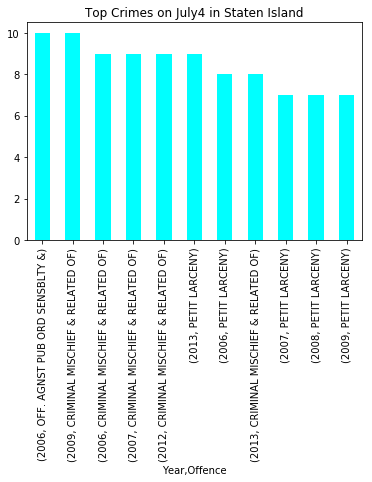

In [69]:
staten_crimes.plot.bar(color='cyan', title="Top Crimes on July4 in Staten Island")